1. Need to Install Pandas and Seaborn, Matplotlib package in the terminal

In [13]:
import pandas as pd
player_data = pd.read_csv('All_Player_data.csv')
print(player_data.head())

  Team        full_name first_name  last_name Pos    Ht   Wt  \
0  CLE     Craig Porter      Craig     Porter  PG   6-2  186   
1  MEM   Xavier Tillman     Xavier    Tillman   C   6-8  245   
2  BOS   Xavier Tillman     Xavier    Tillman  PF   6-8  245   
3  MEM       GG Jackson         GG    Jackson  PF   6-9  215   
4  LAL  Harry Giles III      Harry  Giles III   C  6-11  240   

          Birth Date Country Exp                              College  \
0  February 26, 2000      us   R  Vincennes University, Wichita State   
1   January 12, 1999      us   2                       Michigan State   
2   January 12, 1999      us   3                       Michigan State   
3  December 17, 2004      us   R                       South Carolina   
4     April 22, 1998      us   3                                 Duke   

        id  is_active  Season  
0  1641854       True    2024  
1  1630214       True    2023  
2  1630214       True    2024  
3  1641713       True    2024  
4  1628385      

In [14]:
# Check dataframe info for data types and null values
print(player_data.info())



# Check for unique values in categorical columns
print(player_data['Pos'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        976 non-null    object
 1   full_name   976 non-null    object
 2   first_name  976 non-null    object
 3   last_name   976 non-null    object
 4   Pos         976 non-null    object
 5   Ht          976 non-null    object
 6   Wt          976 non-null    int64 
 7   Birth Date  976 non-null    object
 8   Country     976 non-null    object
 9   Exp         976 non-null    object
 10  College     861 non-null    object
 11  id          976 non-null    int64 
 12  is_active   976 non-null    bool  
 13  Season      976 non-null    int64 
dtypes: bool(1), int64(3), object(10)
memory usage: 100.2+ KB
None
Pos
SG    227
SF    203
PF    192
C     186
PG    168
Name: count, dtype: int64


In [15]:
# Convert 'Ht' from feet-inches to inches
player_data['Ht'] = player_data['Ht'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))

# Handling missing values (if any)
player_data = player_data.fillna({'Exp': '0'})  # Assuming missing experience means new player

# Normalize text data
player_data['Country'] = player_data['Country'].str.upper()  # Standardize country names to uppercase


In [16]:
player_data

Team        full_name first_name  last_name Pos  Ht   Wt  \
0    CLE     Craig Porter      Craig     Porter  PG  74  186   
1    MEM   Xavier Tillman     Xavier    Tillman   C  80  245   
2    BOS   Xavier Tillman     Xavier    Tillman  PF  80  245   
3    MEM       GG Jackson         GG    Jackson  PF  81  215   
4    LAL  Harry Giles III      Harry  Giles III   C  83  240   
..   ...              ...        ...        ...  ..  ..  ...   
971  LAL     Max Christie        Max   Christie  SG  78  190   
972  LAL     Max Christie        Max   Christie  SG  78  190   
973  BOS    Derrick White    Derrick      White  SG  76  190   
974  BOS    Derrick White    Derrick      White  SG  76  190   
975  CLE      Ricky Rubio      Ricky      Rubio  PG  74  190   

            Birth Date Country Exp                              College  \
0    February 26, 2000      US   R  Vincennes University, Wichita State   
1     January 12, 1999      US   2                       Michigan State   
2     January 12, 1999      US   3                       Michigan State   
3    December 17, 2004      US   R                       South Carolina   
4       April 22, 1998      US   3                                 Duke   
..                 ...     ...  ..                                  ...   
971  February 10, 2003      US   R                       Michigan State   
972  February 10, 2003      US   1                       Michigan State   
973       July 2, 1994      US   5  Colorado-Colorado Springs, Colorado   
974       July 2, 1994      US   6  Colorado-Colorado Springs, Colorado   
975   October 21, 1990      ES  11                                  NaN   

          id  is_active  Season  
0    1641854       True    2024  
1    1630214       True    2023  
2    1630214       True    2024  
3    1641713       True    2024  
4    1628385       True    2024  
..       ...        ...     ...  
971  1631108       True    2023  
972  1631108       True    2024  
973  1628401       True    2023  
974  1628401       True    2024  
975   201937       True    2023  

[976 rows x 14 columns]

Before we join two dataset, we want to view it separately.

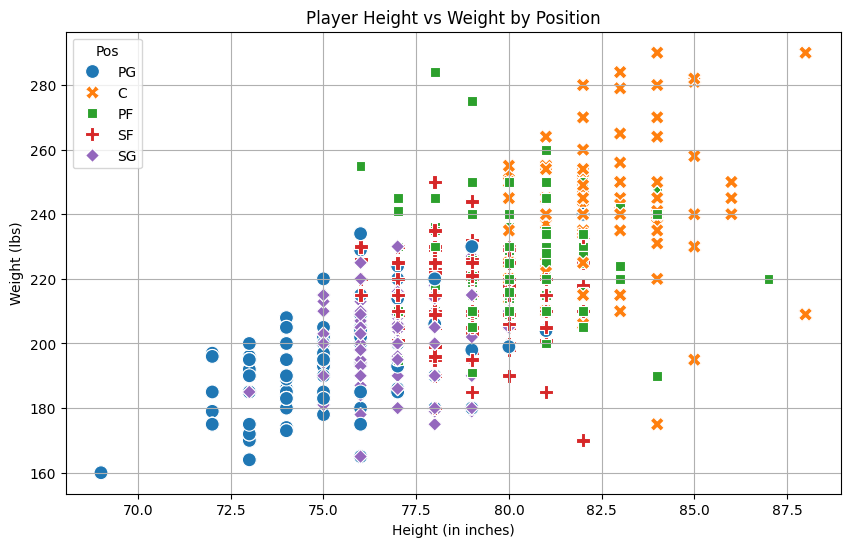

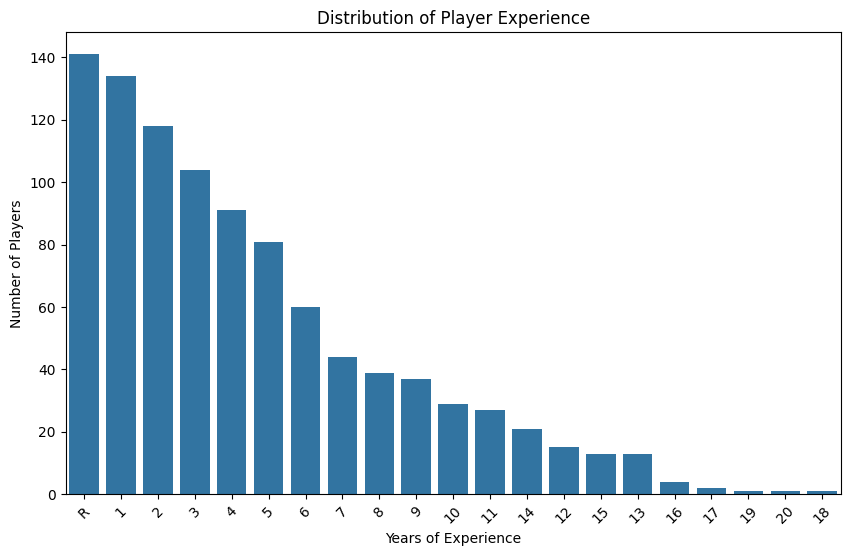

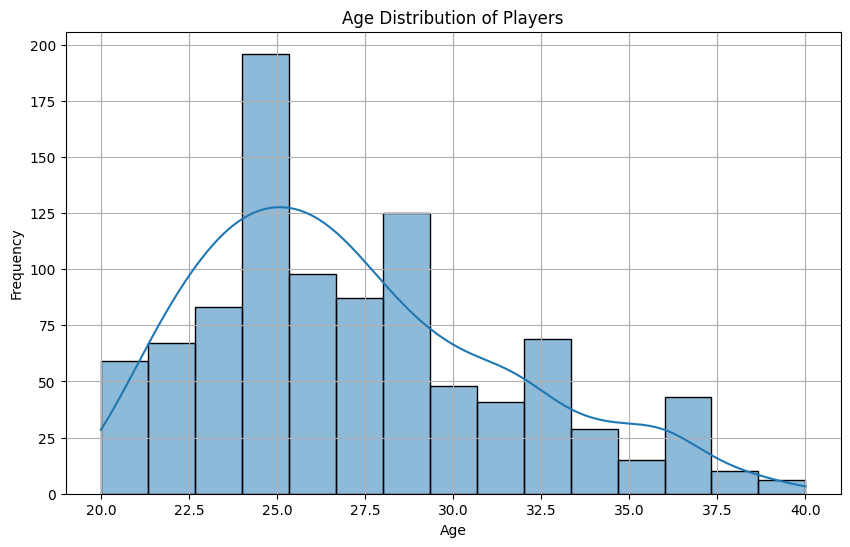

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Height vs. Weight Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ht', y='Wt', data=player_data, hue='Pos', style='Pos', s=100)
plt.title('Player Height vs Weight by Position')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (lbs)')
plt.grid(True)
plt.show()


# Distribution of Player Experience

exp_counts = player_data['Exp'].value_counts().reset_index()
exp_counts.columns = ['Exp', 'Count']

# If 'Exp' cannot be converted to numbers (e.g., contains text), sort by 'Count' instead
exp_counts = exp_counts.sort_values(by='Count', ascending=False)

# Ensure the plot uses this order
order = exp_counts['Exp'].astype(str)  # Convert back to string if necessary

plt.figure(figsize=(10, 6))
sns.countplot(x='Exp', data=player_data, order=order)
plt.title('Distribution of Player Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()




# Age distribution across the dataset
player_data['Age'] = 2024 - pd.to_datetime(player_data['Birth Date']).dt.year  # Assuming current year is 2024
plt.figure(figsize=(10, 6))
sns.histplot(player_data['Age'], bins=15, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


2. Filter the dataset by Position of SG (Shooting Guard) or SF (Small Forward)

In [28]:

filter_df = player_data.query("Pos == 'SG' or Pos == 'SF'")

print(filter_df.head())

# Alternative approach using boolean indexing
# filter_df = player_data[(player_data['Pos'] == 'SG') | (player_data['Pos'] == 'SF')]

#  Display the first few rows to confirm the filter
# print(filter_df.head())


   Team             full_name first_name    last_name Pos  Ht   Wt  \
6   HOU  Jermaine Samuels Jr.   Jermaine  Samuels Jr.  SF  79  230   
9   HOU    Reggie Bullock Jr.     Reggie  Bullock Jr.  SF  78  205   
11  TOR            OG Anunoby         OG      Anunoby  SF  79  232   
12  NYK            OG Anunoby         OG      Anunoby  SF  79  232   
13  WAS       Bilal Coulibaly      Bilal    Coulibaly  SF  78  195   

           Birth Date Country Exp    College       id  is_active  Season  Age  
6   November 13, 1998      US   R  Villanova  1631257       True    2024   26  
9      March 16, 1991      US  10        UNC   203493       True    2024   33  
11      July 17, 1997      GB   5    Indiana  1628384       True    2023   27  
12      July 17, 1997      GB   6    Indiana  1628384       True    2024   27  
13      July 26, 2004      FR   R        NaN  1641731       True    2024   20  


In [29]:
#Sample Code, change the file name
# Load the datasets

shot_data = pd.read_csv('filtered_players_shot_data_update.csv')

# Print the first few rows to understand their structure
print("\nInfo Data Preview:")
print(shot_data.head())

# Perform the join
# Assume the column name display differently in the dataset
combined_data = pd.merge(shot_data, filter_df, left_on=['PLAYER_NAME', 'SEASON'], right_on=['full_name', 'Season'], how='inner')

# Display the first few rows of the combined dataframe to verify the join
print("\nCombined Data Preview:")
print(combined_data.head())


# Save the combined data to a new CSV file
combined_data.to_csv('combined_player_data.csv', index=False)





Info Data Preview:
           GRID_TYPE   GAME_ID  GAME_EVENT_ID  PLAYER_ID       PLAYER_NAME  \
0  Shot Chart Detail  22200008             89    1630173  Precious Achiuwa   
1  Shot Chart Detail  22200008            113    1630173  Precious Achiuwa   
2  Shot Chart Detail  22200008            474    1630173  Precious Achiuwa   
3  Shot Chart Detail  22200008            511    1630173  Precious Achiuwa   
4  Shot Chart Detail  22200008            542    1630173  Precious Achiuwa   

      TEAM_ID        TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  1610612761  Toronto Raptors       1                  4                 50   
1  1610612761  Toronto Raptors       1                  3                 59   
2  1610612761  Toronto Raptors       3                  3                  8   
3  1610612761  Toronto Raptors       3                  0                 41   
4  1610612761  Toronto Raptors       4                 10                 18   

   ... LOC_X LOC_Y SHOT_ATTEMP

In [30]:
combined_data.describe()

GAME_ID  GAME_EVENT_ID     PLAYER_ID       TEAM_ID         PERIOD  \
count  1.825460e+05  182546.000000  1.825460e+05  1.825460e+05  182546.000000   
mean   2.224585e+07     325.429010  1.361565e+06  1.610613e+09       2.483560   
std    4.976297e+04     195.054085  5.570397e+05  8.842071e+00       1.129422   
min    2.220000e+07       4.000000  2.015690e+05  1.610613e+09       1.000000   
25%    2.220058e+07     157.000000  1.627736e+06  1.610613e+09       1.000000   
50%    2.220113e+07     323.000000  1.629014e+06  1.610613e+09       2.000000   
75%    2.230054e+07     489.000000  1.630217e+06  1.610613e+09       3.000000   
max    2.230123e+07     873.000000  1.631323e+06  1.610613e+09       6.000000   

       MINUTES_REMAINING  SECONDS_REMAINING  SHOT_DISTANCE          LOC_X  \
count      182546.000000      182546.000000  182546.000000  182546.000000   
mean            5.367283          28.828093      15.215551      -2.772468   
std             3.444033          17.449347      10.445900     126.309384   
min             0.000000           0.000000       0.000000    -250.000000   
25%             2.000000          14.000000       4.000000     -77.000000   
50%             5.000000          29.000000      18.000000       0.000000   
75%             8.000000          44.000000      25.000000      66.000000   
max            11.000000          59.000000      82.000000     250.000000   

               LOC_Y  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG     GAME_DATE  \
count  182546.000000             182546.0   182546.000000  1.825460e+05   
mean      102.403082                  1.0        0.452511  2.023100e+07   
std        95.600898                  0.0        0.497741  6.817185e+03   
min       -52.000000                  1.0        0.000000  2.022102e+07   
25%        16.000000                  1.0        0.000000  2.023010e+07   
50%        69.000000                  1.0        0.000000  2.023033e+07   
75%       193.000000                  1.0        1.000000  2.024011e+07   
max       820.000000                  1.0        1.000000  2.024041e+07   

              SEASON             Ht             Wt            id  \
count  182546.000000  182546.000000  182546.000000  1.825460e+05   
mean     2023.452291      77.517831     207.758340  1.361565e+06   
std         0.497720       1.841899      13.786572  5.570397e+05   
min      2023.000000      73.000000     165.000000  2.015690e+05   
25%      2023.000000      76.000000     200.000000  1.627736e+06   
50%      2023.000000      77.000000     210.000000  1.629014e+06   
75%      2024.000000      79.000000     218.000000  1.630217e+06   
max      2024.000000      82.000000     250.000000  1.631323e+06   

              Season            Age  
count  182546.000000  182546.000000  
mean     2023.452291      27.150581  
std         0.497720       3.703347  
min      2023.000000      21.000000  
25%      2023.000000      24.000000  
50%      2023.000000      27.000000  
75%      2024.000000      29.000000  
max      2024.000000      38.000000

 ## Exploratory Data Analysis

C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\2536818926.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shooting_efficiency = combined_data.groupby(['Pos', 'SHOT_ZONE_BASIC']).apply(


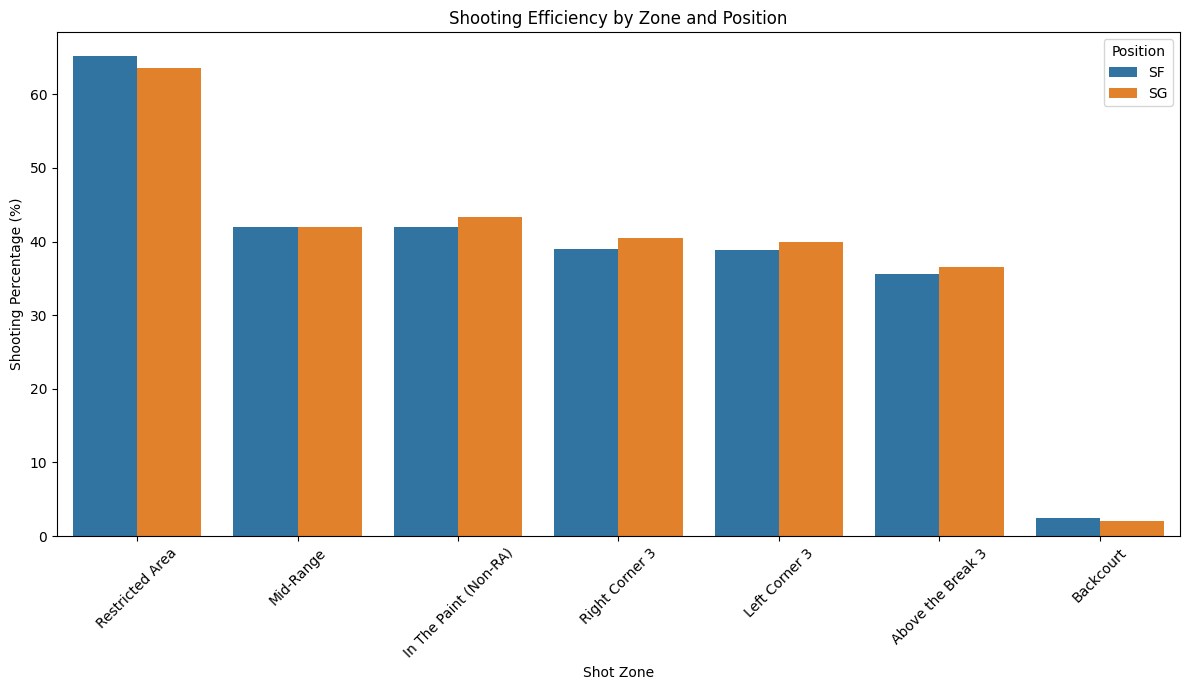

C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\2536818926.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  action_type_efficiency = combined_data.groupby(['Pos', 'ACTION_TYPE']).apply(


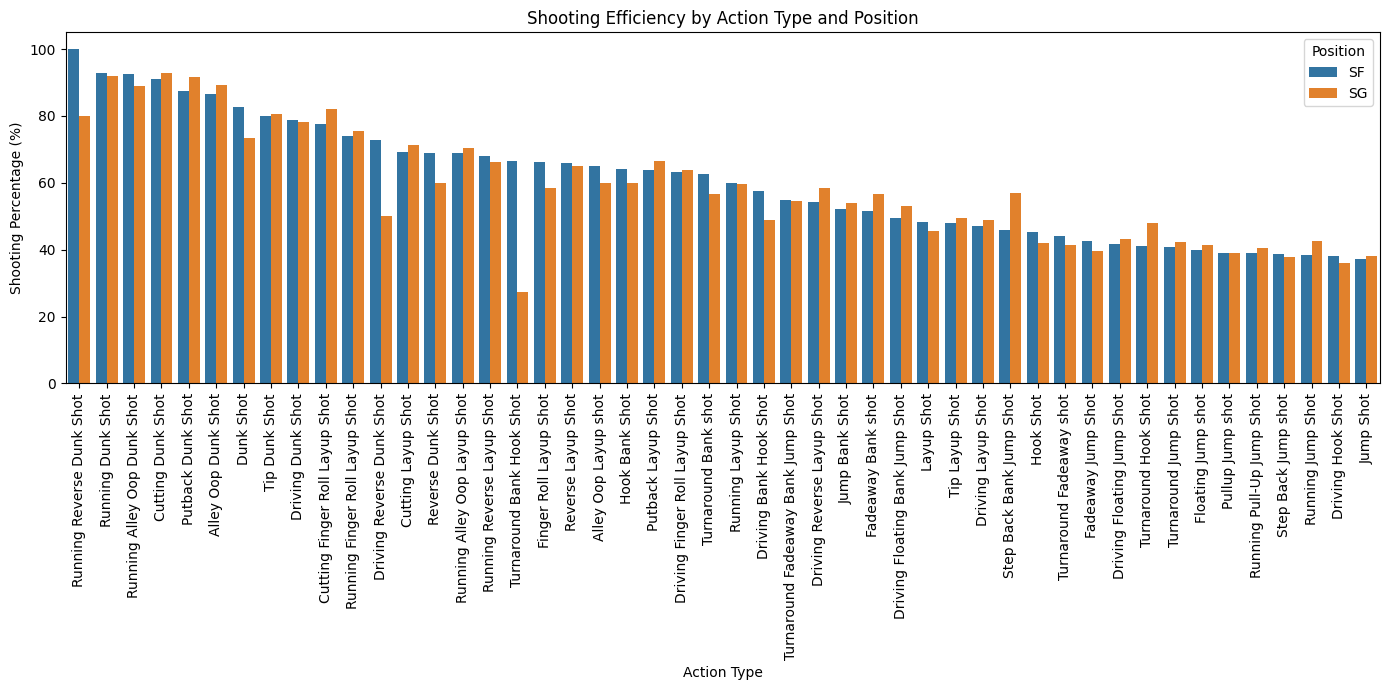

In [78]:

# 1. Positional Variation in Shooting Locations
# Calculate the shooting efficiency by shot zone and position
shooting_efficiency = combined_data.groupby(['Pos', 'SHOT_ZONE_BASIC']).apply(
    lambda x: pd.Series({
        'Total Shots': x['SHOT_ATTEMPTED_FLAG'].sum(),
        'Shots Made': x['SHOT_MADE_FLAG'].sum(),
        'Shooting Percentage': x['SHOT_MADE_FLAG'].sum() / x['SHOT_ATTEMPTED_FLAG'].sum() * 100
    })
).reset_index().sort_values(by=['Pos', 'Shooting Percentage'], ascending=[True, False])

# Plotting shooting efficiency by shot zone and position
plt.figure(figsize=(12, 7))
sns.barplot(x='SHOT_ZONE_BASIC', y='Shooting Percentage', hue='Pos', data=shooting_efficiency)
plt.title('Shooting Efficiency by Zone and Position')
plt.xticks(rotation=45)
plt.ylabel('Shooting Percentage (%)')
plt.xlabel('Shot Zone')
plt.legend(title='Position')
plt.tight_layout()
plt.show()

# 2. Impact of Action Type on Shooting Success by Position
# Analyzing action type impact
action_type_efficiency = combined_data.groupby(['Pos', 'ACTION_TYPE']).apply(
    lambda x: pd.Series({
        'Total Shots': x['SHOT_ATTEMPTED_FLAG'].sum(),
        'Shots Made': x['SHOT_MADE_FLAG'].sum(),
        'Shooting Percentage': x['SHOT_MADE_FLAG'].sum() / x['SHOT_ATTEMPTED_FLAG'].sum() * 100
    })
).reset_index().sort_values(by=['Pos', 'Shooting Percentage'], ascending=[True, False])

# Plotting action type impact by position
plt.figure(figsize=(14, 7))
sns.barplot(x='ACTION_TYPE', y='Shooting Percentage', hue='Pos', data=action_type_efficiency)
plt.title('Shooting Efficiency by Action Type and Position')
plt.xticks(rotation=90)
plt.ylabel('Shooting Percentage (%)')
plt.xlabel('Action Type')
plt.legend(title='Position')
plt.tight_layout()
plt.show()


C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\3919611420.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


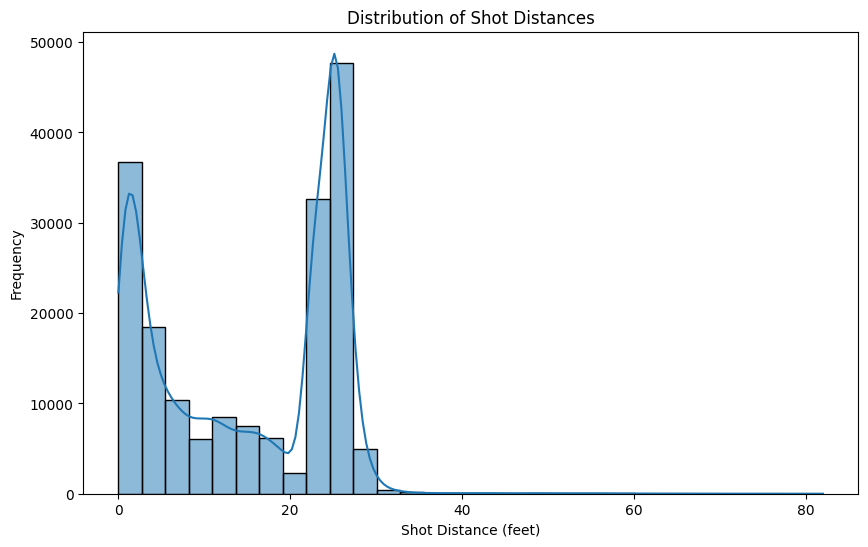

         PLAYER_NAME Pos  SHOT_EFFICIENCY
0        A.J. Lawson  SG         0.468900
1         AJ Griffin  SF         0.447059
2      Aaron Nesmith  SF         0.462857
3      Aaron Wiggins  SG         0.537838
4         Alec Burks  SG         0.398833
..               ...  ..              ...
192  Wesley Matthews  SF         0.362500
193  Wesley Matthews  SG         0.350515
194    Yuta Watanabe  SF         0.445402
195      Zach LaVine  SG         0.477891
196  Ziaire Williams  SF         0.407666

[197 rows x 3 columns]


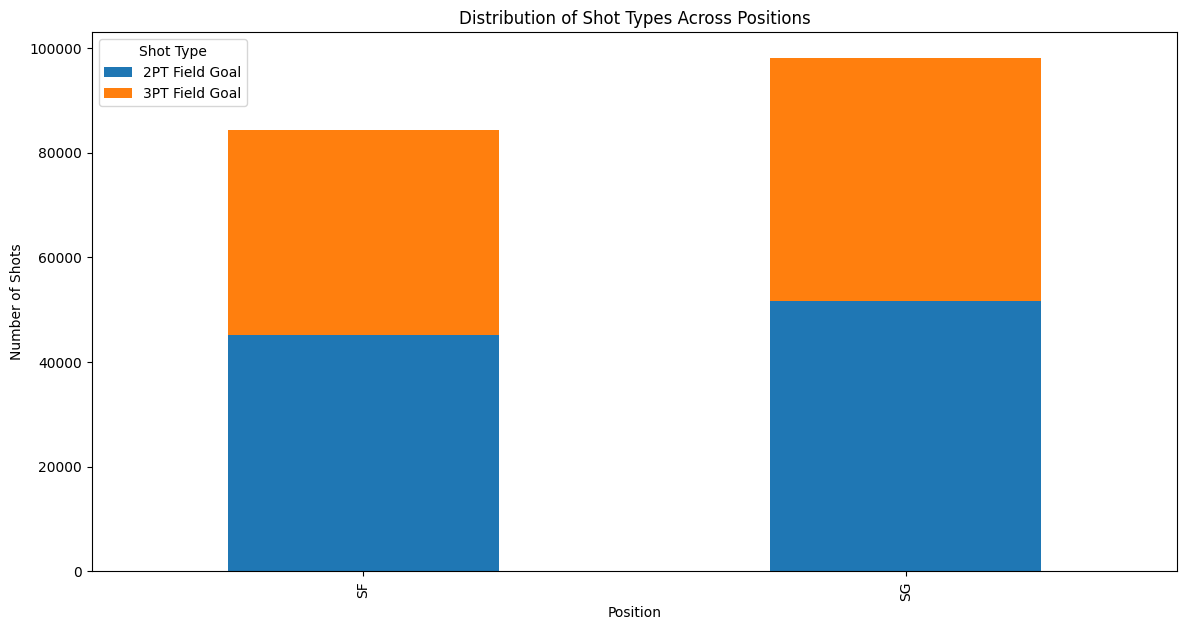

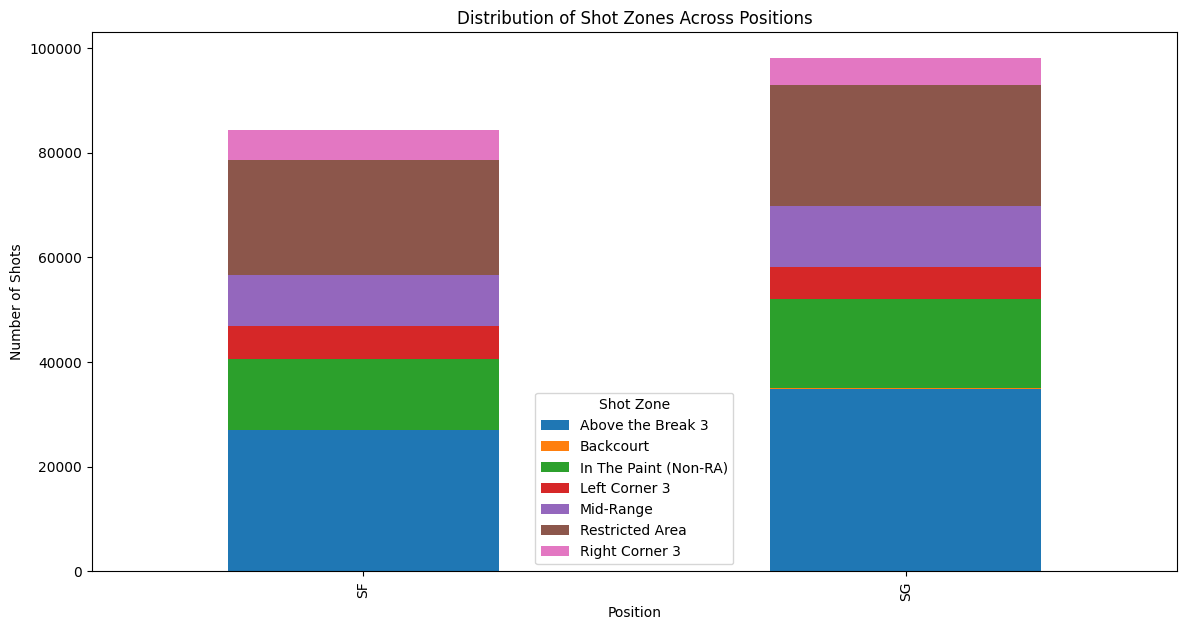

In [79]:

# Initial Data Cleaning
combined_data['Birth Date'] = pd.to_datetime(combined_data['Birth Date'])
combined_data['GAME_DATE'] = pd.to_datetime(combined_data['GAME_DATE'])
numeric_columns = ['Ht', 'Wt', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y']
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
combined_data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['SHOT_DISTANCE'], bins=30, kde=True)
plt.title('Distribution of Shot Distances')
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Frequency')
plt.show()



# Shot Efficiency Analysis
combined_data['SHOT_EFFICIENCY'] = combined_data['SHOT_MADE_FLAG'] / combined_data['SHOT_ATTEMPTED_FLAG']
shot_efficiency = combined_data.groupby(['PLAYER_NAME', 'Pos'])['SHOT_EFFICIENCY'].mean().reset_index()

print(shot_efficiency)

# Comparative Analysis of Player Styles
shot_types = combined_data.groupby(['Pos', 'SHOT_TYPE']).size().unstack(fill_value=0)
shot_zones = combined_data.groupby(['Pos', 'SHOT_ZONE_BASIC']).size().unstack(fill_value=0)

shot_types.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Shot Types Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Shots')
plt.legend(title='Shot Type')
plt.show()

shot_zones.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Shot Zones Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Shots')
plt.legend(title='Shot Zone')
plt.show()


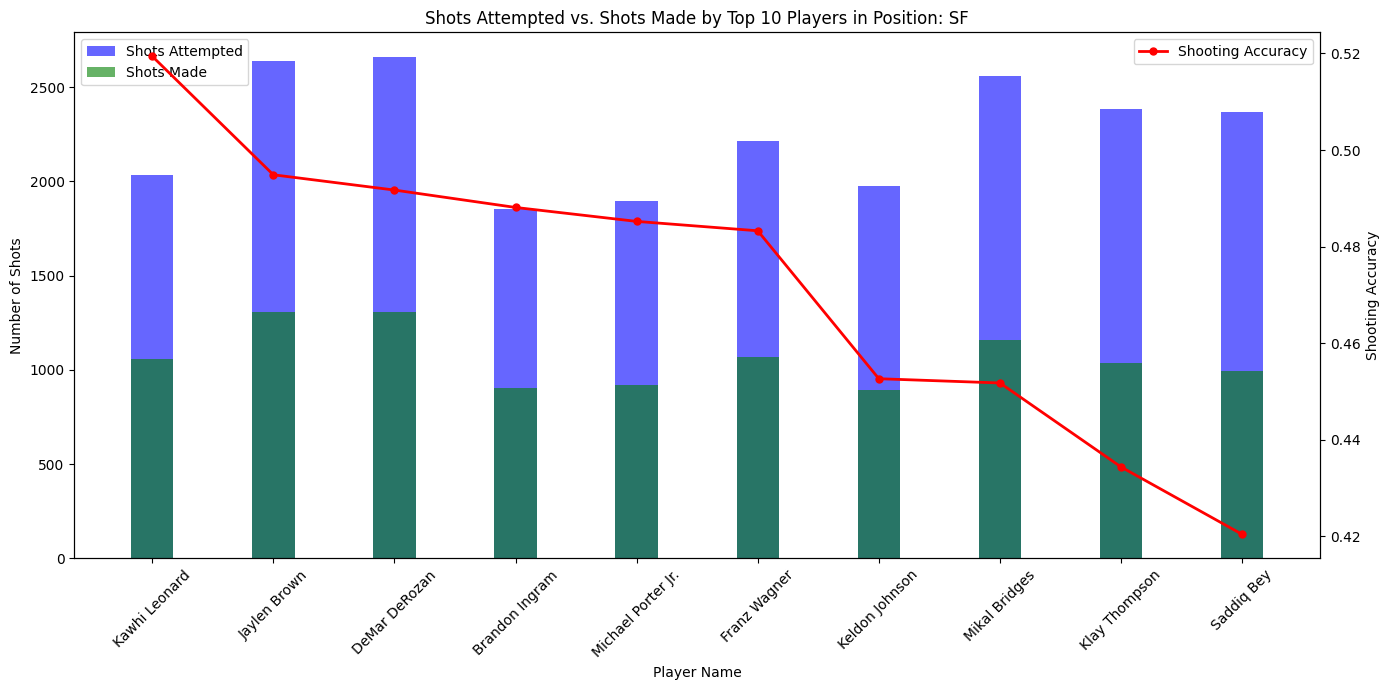

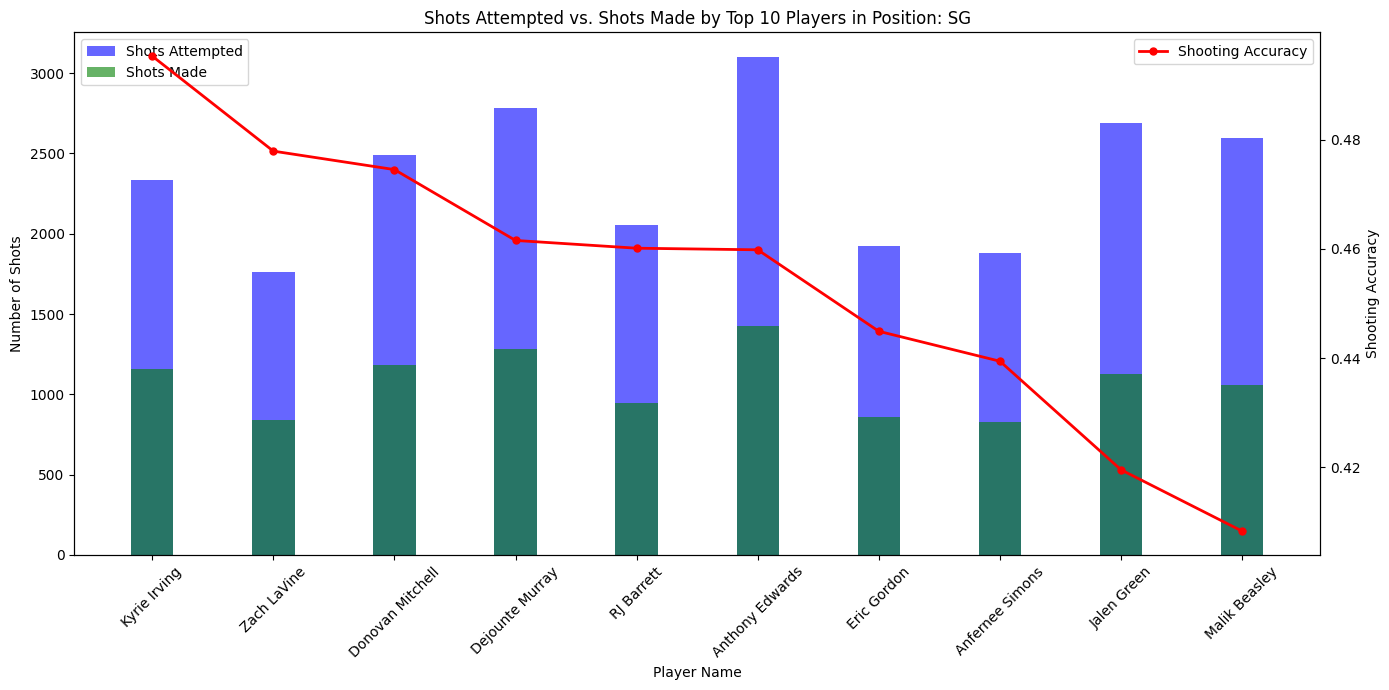

In [84]:
position_player_group = combined_data.groupby(['Pos', 'PLAYER_NAME']).agg(
    shots_attempted=pd.NamedAgg(column='SHOT_ATTEMPTED_FLAG', aggfunc='sum'),
    shots_made=pd.NamedAgg(column='SHOT_MADE_FLAG', aggfunc='sum')
).reset_index()

# Step 2: Calculate Shooting Accuracy
position_player_group['shooting_accuracy'] = position_player_group['shots_made'] / position_player_group['shots_attempted']

# Step 3: Rank Players within Each Position by Shots Made
position_player_group['rank'] = position_player_group.groupby('Pos')['shots_made'].rank(method='first', ascending=False)

# Step 4: Select Top 10 Players in Each Position
top_players_per_position = position_player_group[position_player_group['rank'] <= 10]

# Step 5: Visualize the Data
positions = top_players_per_position['Pos'].unique()

for pos in positions:
    top_players = top_players_per_position[top_players_per_position['Pos'] == pos].sort_values(by='shooting_accuracy', ascending=False)
    
    fig, ax1 = plt.subplots(figsize=(14, 7))

    bar_width = 0.35
    index = top_players['PLAYER_NAME']
    
    bar1 = ax1.bar(index, top_players['shots_attempted'], bar_width, color='blue', alpha=0.6, label='Shots Attempted')
    bar2 = ax1.bar(index, top_players['shots_made'], bar_width, color='green', alpha=0.6, label='Shots Made')
    
    ax1.set_xlabel('Player Name')
    ax1.set_ylabel('Number of Shots')
    ax1.set_title(f'Shots Attempted vs. Shots Made by Top 10 Players in Position: {pos}')
    ax1.legend(loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(index, top_players['shooting_accuracy'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Shooting Accuracy')
    ax2.set_ylabel('Shooting Accuracy')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\23748195.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_pressure_efficiency = high_pressure_shots.groupby(['Pos', 'SHOT_TYPE']).apply(


<Figure size 1200x800 with 0 Axes>

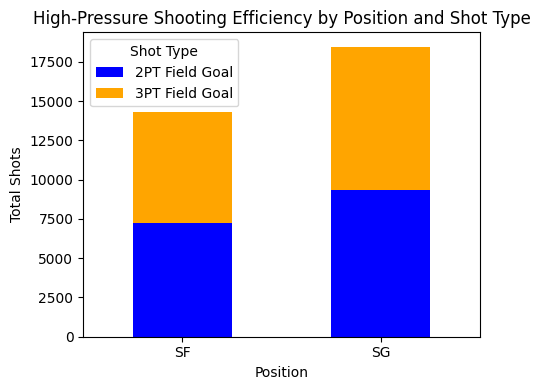

In [94]:


# Calculate total remaining time in seconds for each shot
combined_data['Remaining Time (s)'] = combined_data['MINUTES_REMAINING'] * 60 + combined_data['SECONDS_REMAINING']


# Filter shots taken in the final two minutes (120 seconds)
high_pressure_shots = combined_data[combined_data['Remaining Time (s)'] < 120]

# Calculate shooting efficiency during these moments by position
high_pressure_efficiency = high_pressure_shots.groupby(['Pos', 'SHOT_TYPE']).apply(
    lambda x: pd.Series({
        'Total Shots': x['SHOT_ATTEMPTED_FLAG'].sum(),
        'Shots Made': x['SHOT_MADE_FLAG'].sum(),
        'Shooting Percentage': x['SHOT_MADE_FLAG'].sum() / x['SHOT_ATTEMPTED_FLAG'].sum() * 100
    })
).reset_index()

# Create a stacked bar chart for high-pressure shooting efficiency
plt.figure(figsize=(12, 8))

# Pivot data to get shot types as columns
pivot_data = high_pressure_efficiency.pivot(index='Pos', columns='SHOT_TYPE', values='Total Shots').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(5, 4), color=['blue', 'orange'])

plt.title('High-Pressure Shooting Efficiency by Position and Shot Type')
plt.ylabel('Total Shots')
plt.xlabel('Position')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.legend(title='Shot Type')
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
print("LOC_X range:", combined_data['LOC_X'].min(), "to", combined_data['LOC_X'].max())
print("LOC_Y range:", combined_data['LOC_Y'].min(), "to", combined_data['LOC_Y'].max())


LOC_X range: -250 to 250
LOC_Y range: -52 to 820


C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\2312785176.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['counts'] = position_data.groupby(['LOC_X', 'LOC_Y', 'SEASON'])['SHOT_MADE_FLAG'].transform('size')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


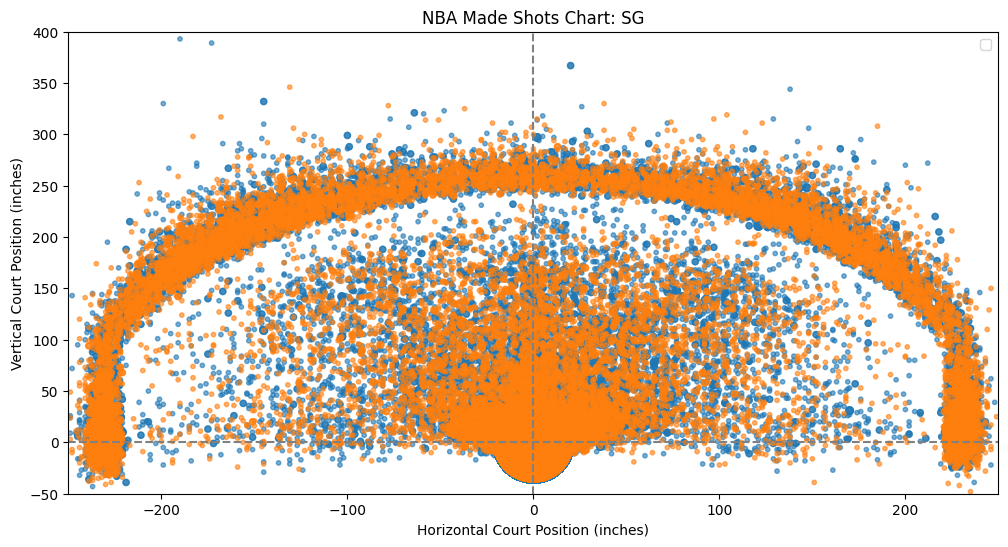

C:\Users\joyce\AppData\Local\Temp\ipykernel_14976\2312785176.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_data['counts'] = position_data.groupby(['LOC_X', 'LOC_Y', 'SEASON'])['SHOT_MADE_FLAG'].transform('size')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


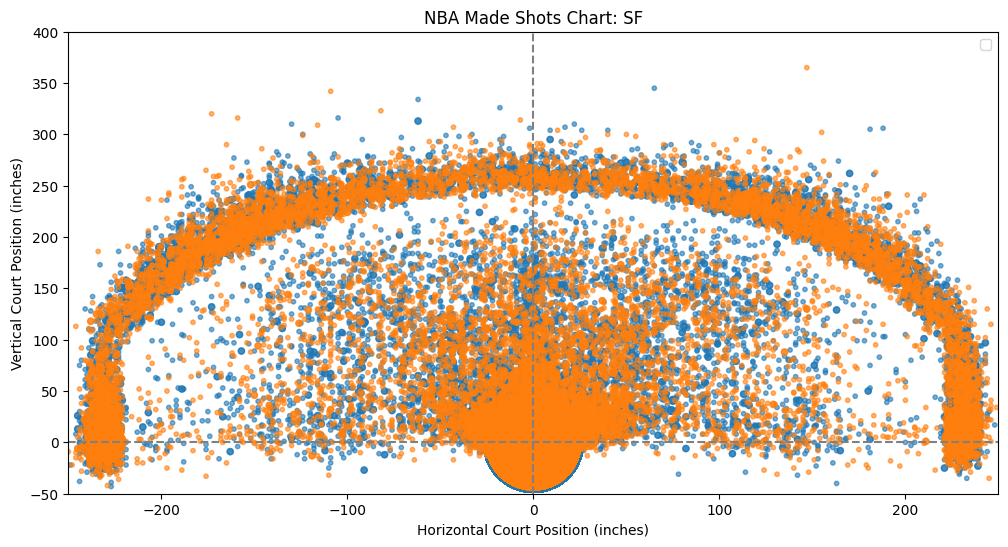

In [61]:

# Filter for 'Made Shot' only
made_shots = combined_data[combined_data['EVENT_TYPE'] == 'Made Shot']

# Set a color palette for the seasons
season_colors = {
    '2023': 'blue',
    '2024': 'green'
}

# Generate plots for each position separately
for pos in made_shots['Pos'].unique():
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current position
    position_data = made_shots[made_shots['Pos'] == pos]
    
    # Group by position, location, and season to count made shots
    position_data['counts'] = position_data.groupby(['LOC_X', 'LOC_Y', 'SEASON'])['SHOT_MADE_FLAG'].transform('size')
    
    # Create scatter plot
    for season in position_data['SEASON'].unique():
        season_data = position_data[position_data['SEASON'] == season]
        plt.scatter(x=season_data['LOC_X'], y=season_data['LOC_Y'],
                    s=season_data['counts']*10,  # Adjust size multiplier as needed
                    alpha=0.6)
    
    # Setting the axis limits
    plt.xlim(-250, 250)
    plt.ylim(-50, 400)

    # Adding court lines for reference
    plt.axhline(y=0, color='gray', linestyle='--')  # Half-court line
    plt.axvline(x=0, color='gray', linestyle='--')  # Middle of the court line

    # Adding labels and title
    plt.title(f'NBA Made Shots Chart: {pos}')
    plt.xlabel('Horizontal Court Position (inches)')
    plt.ylabel('Vertical Court Position (inches)')
    plt.legend()

    # Show the plot
    plt.show()


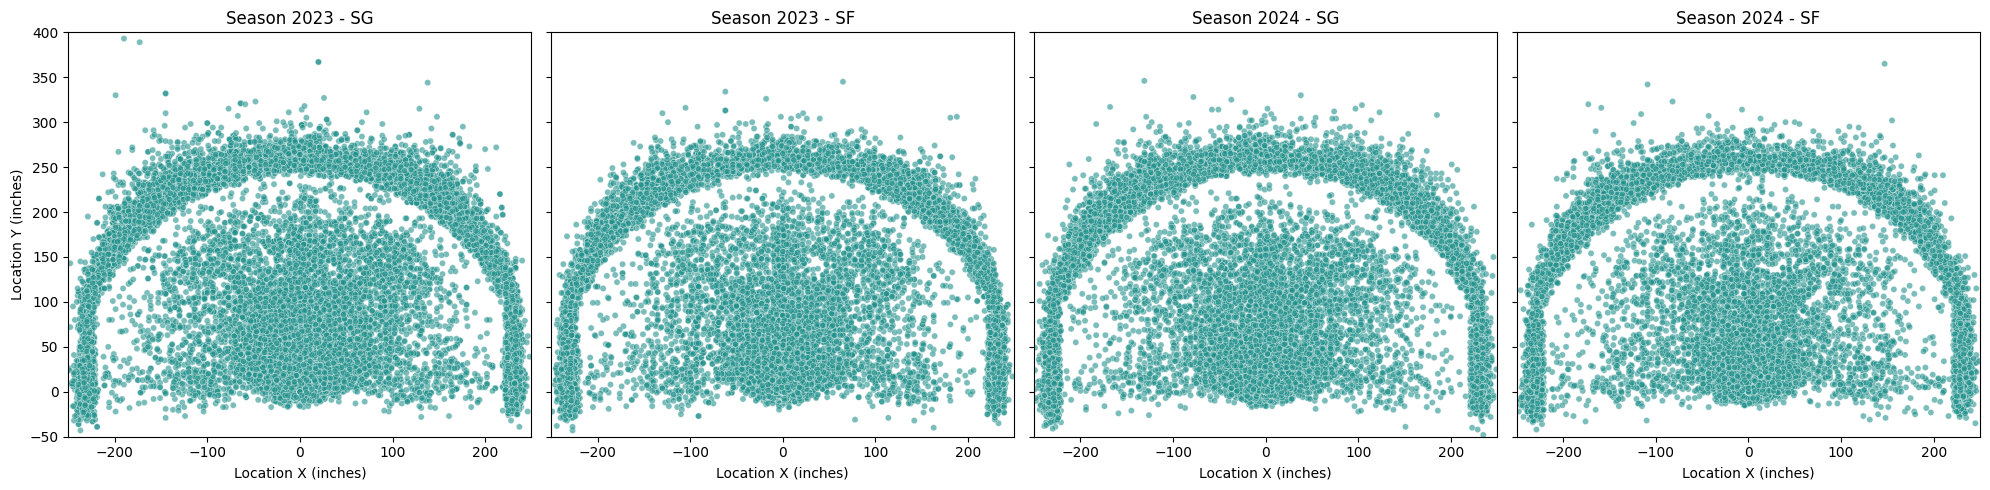

In [62]:

made_shots = combined_data[combined_data['EVENT_TYPE'] == 'Made Shot']

# Filter for positions SG and SF, and the relevant seasons
positions = ['SG', 'SF']
seasons = ['2023', '2024']

# Create a figure and axes with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Index for subplots
ax_idx = 0

for season in seasons:
    for pos in positions:
        # Filter data for the current season and position
        data = made_shots[(made_shots['Pos'] == pos) & (made_shots['SEASON'].astype(str) == season)]
        
        # Plot the data
        sns.scatterplot(x='LOC_X', y='LOC_Y', size='SHOT_MADE_FLAG', sizes=(20, 200),
                        hue='Pos', palette='viridis', alpha=0.6, data=data,
                        ax=axes[ax_idx], legend=None)
        
        # Setting plot titles and labels
        axes[ax_idx].set_title(f'Season {season} - {pos}')
        axes[ax_idx].set_xlabel('Location X (inches)')
        if ax_idx == 0:
            axes[ax_idx].set_ylabel('Location Y (inches)')
        else:
            axes[ax_idx].set_ylabel('')
        
        # Set the same scale for X and Y
        axes[ax_idx].set_xlim(-250, 250)
        axes[ax_idx].set_ylim(-50, 400)

        # Move to the next subplot
        ax_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()


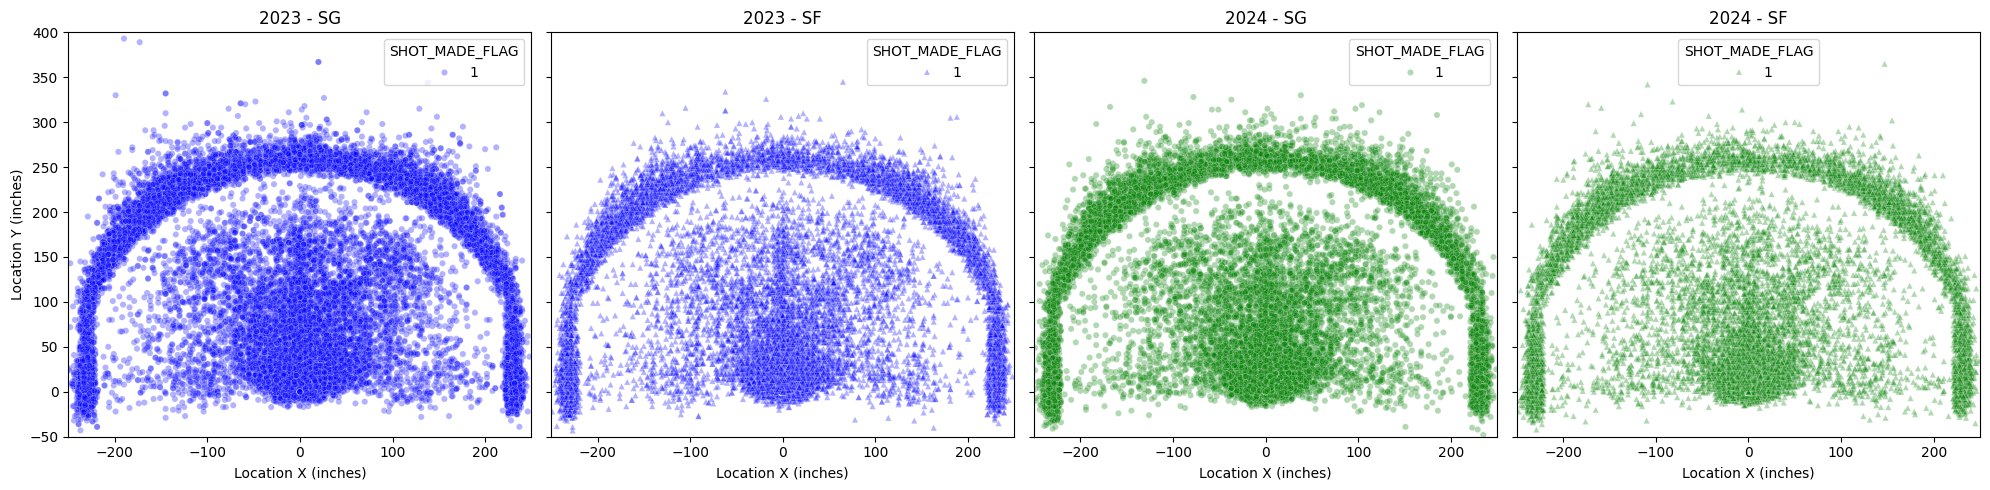

In [65]:


fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
positions = ['SG', 'SF']
seasons = ['2023', '2024']
markers = {'SG': 'o', 'SF': '^'}  # Different markers for positions
colors = {'2023': 'blue', '2024': 'green'}  # Different colors for seasons

for i, season in enumerate(seasons):
    for j, pos in enumerate(positions):
        ax = axes[i * 2 + j]
        data = made_shots[(made_shots['Pos'] == pos) & (made_shots['SEASON'].astype(str) == season)]
        sns.scatterplot(x='LOC_X', y='LOC_Y', alpha=0.3, marker=markers[pos], color=colors[season],
                        size='SHOT_MADE_FLAG', sizes=(20, 200), data=data, ax=ax)
        ax.set_title(f'{season} - {pos}')
        ax.set_xlim(-250, 250)
        ax.set_ylim(-50, 400)
        if j == 0:
            ax.set_ylabel('Location Y (inches)')
        else:
            ax.set_ylabel('')
        ax.set_xlabel('Location X (inches)')

plt.tight_layout()
plt.show()


## Look at 3 point field

In [66]:
# Define the zones for three-point shots and paint shots
three_point_zones = ['Left Corner 3', 'Right Corner 3', 'Above the Break 3']
paint_zones = ['Restricted Area', 'In The Paint (Non-RA)']

# Filter data for three-point shots
three_point_data = combined_data[combined_data['SHOT_ZONE_BASIC'].isin(three_point_zones)]

# Filter data for paint shots
paint_data = combined_data[combined_data['SHOT_ZONE_BASIC'].isin(paint_zones)]
